In [76]:
%matplotlib inline
import os
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn.datasets import fetch_openml
import pickle
from scipy.special import expit
from sklearn.model_selection import train_test_split

## Open MNIST data and create a subset with desired digits
MNIST dataset contains 70,000 images of hand-written digits from 0 to 9. Each image has a grey-scale resolution of 28 $\times$ 28 (i.e., 784 pixels). Each pixel has an integer value ranging from 0 (bright) to 255 (dark).

<font color=red>Change the code below to select a different subset </font>

In [252]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
y = np.asarray([int(numeric_string) for numeric_string in y])


# Change the conditions below to compare between other two digits.
class1Indices = (y==0)
class2Indices = (y==1)

x1 = X[class1Indices]
x2 = X[class2Indices]

Xtrain = np.concatenate((x1,x2),axis=0)
ytrain = np.concatenate((np.zeros(x1.shape[0]),np.ones(x2.shape[0])),axis=0) # associating 0's with 0 and 1's with 1

# Saving the temporary variables for fast retrieval
with open('temp.pickle', 'wb') as handle:
    pickle.dump([Xtrain, ytrain], handle)



# Split the data to training, testing, and validation subsets
## Component 1 (a) - 70% training, 10% validation, and 20% test

In [266]:
# loading the temporary variables for fast retrieval
with open('temp.pickle', 'rb') as handle:
    Xtrain, ytrain = pickle.load(handle)
    
# Split the data to training, testing, and validation subsets

# First split - 70% training and 30% temporary
X_train, X_temp, y_train, y_temp = train_test_split(Xtrain, ytrain,test_size=0.3, random_state=100)

# Second split - 30% temporary into 20% test and 10% validation
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=100) 

# X_train & y_train = 70%, X_test & y_test = 20%, X_val & y_val = 10%

Nsamples = X_train.shape[0] # samples = 10346 for 0 and 1's subset
Nfeatures = X_train.shape[1] # features = 784



# Accuracy of a classifier
## Component 2 (a) - write function "testLinearClassifier" that taking a (weights), X (test dataset), and y (label)

In [294]:
def testLinearClassifier(at,Xt,yt):
    
    # YOUR CODE HERE
    """
    Parameters:
    - a: Coefficients of the linear classifier (w0)
    - X: Test dataset (X_test)
    - y: True labels for the test dataset (np array)
    """
    # Add a bias term (w0) to the test dataset
    X_test_with_bias = np.c_[Xt, np.ones(Xt.shape[0])]
    
    
    # Debug
    print("Shapes - X_test_with_bias:", X_test_with_bias.shape, "a:", at.shape)
    
    # Calculate the predicted labels using the weights
    predictions = np.dot(X_test_with_bias,at)
    
    # Convert predictions to binary (0 or 1)
    predicted_labels = np.where(predictions > 0, 1, 0)
    
    # Total number of misclassifications
    # misclassifications = np.sum(predicted_labels != yt)
    misclassifications = np.sum(predicted_labels != yt)
    
    return misclassifications


## Define and test gaussianClassifierWithIdentityCovariance 

Shapes - X_test_with_bias: (10346, 785) a: (785,)
Shapes - X_test_with_bias: (1478, 785) a: (785,)
Shapes - X_test_with_bias: (2956, 785) a: (785,)
train:  218
val:  23
test:  59


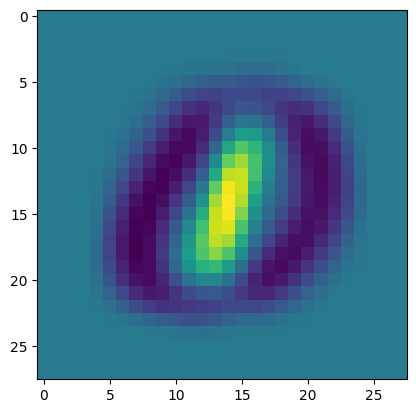

In [295]:
#------TRAINING CODE --------------

from matplotlib.cbook import flatten


def gaussianClassifierWithIdentityCovariance(Xtrain1,ytrain1):
    # X*I=X, the result is the original matrix, hence:
    
    # Separate the data into two classes
    class_1_data =  Xtrain1[ytrain1 == 0]
    class_2_data = Xtrain1[ytrain1 == 1]
    
    # Estimate mean vectors 
    mu1 = np.mean(class_1_data, axis=0)
    mu2 = np.mean(class_2_data, axis=0)
    #a = 0.01*np.random.randn(Nfeatures+1,1)
    
    # Reshape for concatenation
    #mu1 = mu1.reshape((mu1.shape[0], 1))
    #mu2 = mu2.reshape((mu2.shape[0], 1))
    
    # Discriminate function coefficients
    a = np.concatenate([(mu2 - mu1), -0.5 * (mu1 + mu2)])
    
    
    
    
    
    return a
    #YOUR CODE HERE


#------SIMPLE TESTING ON THE TRAINING DATA ITSELF --------------
a = gaussianClassifierWithIdentityCovariance(X_train,y_train)
# a = a.flatten()
plt.imshow(np.reshape(a[0:784],(28,28)))
a = np.reshape(a[0:785],785)

train = testLinearClassifier(a,X_train,y_train)
val = testLinearClassifier(a,X_val,y_val)
test = testLinearClassifier(a,X_test,y_test)
print('train: ', train)
print('val: ', val)
print('test: ', test)




## Define and test gaussianClassifierWithCommonCovariance 

In [246]:
#------TRAINING CODE --------------

def gaussianClassifierWithCommonCovariance(X_train,y_train):

    # a = 0.01*np.random.randn(Nfeatures+1,1)
    print("Complete your code")
    """
    Gaussian classifier with a common covariance matrix.

    Parameters:
    - X_train: Training dataset (numpy array)
    - y_train: Labels for the training dataset (numpy array)

    Returns:
    - a2: Coefficients of the linear classifier [w^T, w0] (numpy array)
    """

    # Separate the data into two classes
    class_1_data = X_train[y_train == 0]
    class_2_data = X_train[y_train == 1]

    # Estimate the mean vectors
    mean_1 = np.mean(class_1_data, axis=0)
    mean_2 = np.mean(class_2_data, axis=0)
       # Reshape for concatenation
    
    

    # Estimate the common covariance matrix
    cov_matrix = np.cov(X_train, rowvar=False) +1e-5*np.identity(X_train.shape[1])

    # Discriminant function coefficients
    cov_inv = np.linalg.inv(cov_matrix)
    a2 = np.dot(cov_inv, a*(mean_2 - mean_1))

    return a2
    
    #return a
    #YOUR CODE HERE

    
#------SIMPLE TESTING ON THE TRAINING DATA ITSELF --------------
a2 = gaussianClassifierWithCommonCovariance(X_train,y_train)

# plt.imshow(np.reshape(a2[0:784],(28,28)))
plt.imshow(a2)

train = testLinearClassifier(a2,X_train,y_train)
val = testLinearClassifier(a2,X_val,y_val)
test = testLinearClassifier(a2,X_test,y_test)
print('train: ', train)
print('val: ', val)
print('test: ', test)


Complete your code


ValueError: operands could not be broadcast together with shapes (785,) (784,) 

Test Accuracy:  0.998
Test Precision: 0.998
Test Recall:    0.998
TestF-score:   0.998

Val Accuracy:  0.999
Val Precision: 0.999
Val Recall:    0.999
ValF-score:   0.999


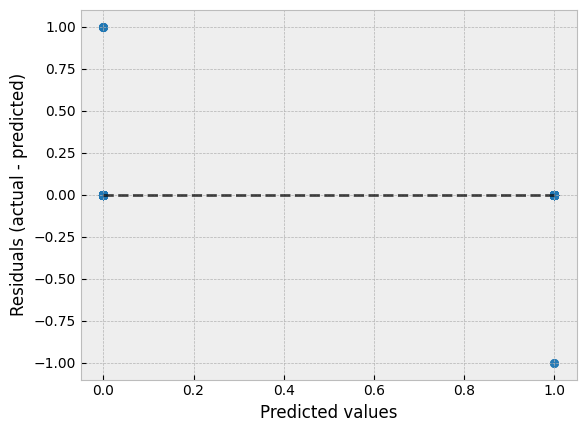

In [448]:
import numpy as np
from dataclasses import dataclass

from sklearn.metrics import PredictionErrorDisplay

@dataclass
class LogisticRegression:
    epochs: int
    learning_rate: float
    threshold: float
    logging: bool

    def sigmoid(self, predictions: np.ndarray) -> np.ndarray:
        """The numerically stable implementation of the Sigmoid activation function."""

        neg_mask = predictions < 0
        pos_mask = ~neg_mask

        zs = np.empty_like(predictions)
        zs[neg_mask] = np.exp(predictions[neg_mask])
        zs[pos_mask] = np.exp(-predictions[pos_mask])

        res = np.ones_like(predictions)
        res[neg_mask] = zs[neg_mask]

        return res / (1 + zs)+1e-4

    def mean_log_loss(self, predictions: np.ndarray, labels: np.ndarray) -> np.float32:
        """Computes the mean Cross Entropy Loss (in binary classification, also called Log-loss)."""

        return -(labels * np.log(predictions) + (1 - labels) * np.log(1 - predictions)).mean()

    def fit(self, features: np.ndarray, labels: np.ndarray) -> None:
        """Fits the Logistic Regression model."""

        num_samples, num_features = features.shape
        self.weights, self.bias = np.zeros(num_features), 0

        for epoch in range(self.epochs):
            prediction = self.sigmoid(features.dot(self.weights) + self.bias)
            difference = prediction - labels  # type: ignore

            d_weights = features.T.dot(difference) / num_samples
            d_bias = difference.sum() / num_samples

            self.weights -= self.learning_rate * d_weights
            self.bias -= self.learning_rate * d_bias

            if self.logging:
                print(f"Mean Log-loss [{epoch}]: {self.mean_log_loss(prediction, labels):.3f}")

    def predict(self, features: np.ndarray) -> np.ndarray:
        """Performs inference using the given features."""

        return np.where(self.sigmoid(features.dot(self.weights) + self.bias) < self.threshold, 0, 1)  # type: ignore


if __name__ == "__main__":
    import matplotlib.pyplot as plt

    
    from sklearn.metrics import accuracy_score, precision_recall_fscore_support
   

    plt.style.use("bmh")


    logistic_regression = LogisticRegression(
        learning_rate=1e-4,
        epochs=100,
        threshold=0.5,
        logging=False,
    )
    logistic_regression.fit(X_train, y_train)  # type: ignore
    predictions = logistic_regression.predict(X_test)  # type: ignore

    accuracy = accuracy_score(y_test, predictions)
    precision, recall, fscore, _ = precision_recall_fscore_support(
        y_test, predictions, average="macro"
    )

    print(f"Test Accuracy:  {accuracy:.3f}")
    print(f"Test Precision: {precision:.3f}")
    print(f"Test Recall:    {recall:.3f}")
    print(f"TestF-score:   {fscore:.3f}\n")
    PredictionErrorDisplay(y_true=y_test,y_pred=predictions).plot()
    
 
    
    predictions = logistic_regression.predict(X_val)  # type: ignore
    accuracy = accuracy_score(y_val, predictions)
    precision, recall, fscore, _ = precision_recall_fscore_support(
        y_val, predictions, average="macro"
    )
    
    
    print(f"Val Accuracy:  {accuracy:.3f}")
    print(f"Val Precision: {precision:.3f}")
    print(f"Val Recall:    {recall:.3f}")
    print(f"ValF-score:   {fscore:.3f}")
  
    

## Define and test logisticRegression 

You may choose the step size as 1e-4. You can try changing it.

Use the expit() function from scipy.special.expit to implement sigmoid without overflow errors 

Shapes - X_test_with_bias: (10346, 785) a: (785,)
Shapes - X_test_with_bias: (1478, 785) a: (785,)
Shapes - X_test_with_bias: (2956, 785) a: (785,)
train:  7
val:  0
test:  3


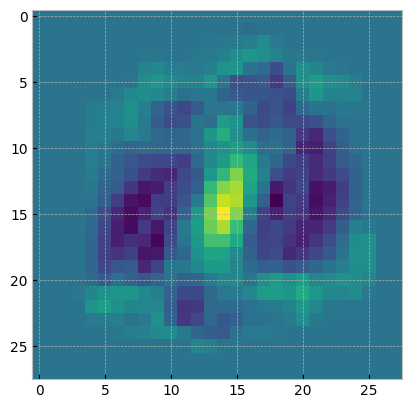

In [474]:
def logisticRegression(Xtrain,ytrain,iterations=100,step_size=1e-4,verbose=False):
    LogisticRegression.epochs=iterations
    LogisticRegression.learning_rate=step_size
    LogisticRegression.logging=verbose
    logistic_regression.fit(Xtrain, ytrain)  # type: ignore
    for epoch in range(iterations):
        prediction = logistic_regression.sigmoid(Xtrain.dot(logistic_regression.weights) + logistic_regression.bias)
        difference = prediction - ytrain  # type: ignore

        d_weights = Xtrain.T.dot(difference) / Nsamples
        d_bias = difference.sum() / Nsamples

        logistic_regression.weights -= logistic_regression.learning_rate * d_weights
        logistic_regression.bias -= logistic_regression.learning_rate * d_bias
        return logistic_regression.weights
    
  
    print("Complete your code")
    
   
    #YOUR CODE HERE
    
#------SIMPLE TESTING ON THE TRAINING DATA ITSELF --------------
a = logisticRegression(X_train,y_train,iterations=500,verbose=False)
plt.imshow(np.reshape(a[0:784],(28,28)))
a = np.append(a,1)

train = testLinearClassifier(a,X_train,y_train)
val = testLinearClassifier(a,X_val,y_val)
test = testLinearClassifier(a,X_test,y_test)

print('train: ', train)
print('val: ', val)
print('test: ', test)



In [ ]:
def logisticRegressionWithRegularization(Xtrain,ytrain,iterations=100,step_size=1e-4,lam=0,verbose=False):


    a = 0.01*np.random.randn(Nfeatures+1,1)
    print("Complete your code")
    
    return a
    #YOUR CODE HERE

    
#------SIMPLE TESTING ON THE TRAINING DATA ITSELF --------------
a = logisticRegressionWithRegularization(X_train,y_train,iterations=500,verbose=False,lam=1)
plt.imshow(np.reshape(a[0:784],(28,28)))

train = testLinearClassifier(a,X_train,y_train)
val = testLinearClassifier(a,X_val,y_val)
test = testLinearClassifier(a,X_test,y_test)


In [ ]:
def optimizeHyperparameters(Xtrain,ytrain):
     
        # YOUR CODE HERE
        
    return lamopt


# REPORT TEST ERRORS OF THE BEST MODELS

YOUR CODE BELOW